In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install turicreate
import turicreate as tc


     |████████████████████████████████| 91.9 MB 43.4 MB/s eta 0:00:01
     |████████████████████████████████| 322 kB 56.4 MB/s eta 0:00:01
     |████████████████████████████████| 86.3 MB 77 kB/s s eta 0:00:01
     |████████████████████████████████| 3.5 MB 27.7 MB/s eta 0:00:01
     |████████████████████████████████| 449 kB 38.1 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 3.8 MB/s  eta 0:00:01
     |████████████████████████████████| 3.8 MB 58.0 MB/s eta 0:00:01
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320848 sha256=877764badb92271acd0714e07e260a1d53d1b4ecc71f2adf3db4e7fc74b88702
  Stored in directory: /root/.cache/pip/wheels/71/74/53/d5ceb7c5ee7a168c7d106041863e71ac3273f4a4677743a284
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7539 sha256=bc9cda914c54756397a2280279f0b311b994e528ce5435477b57fb98aa619119
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Succ

  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow-probability 0.11.0 requires gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
librosa 0.8.0 requires resampy>=0.2.2, but you'll have resampy 0.2.1 which is incompatible.
You should consider upgradi

In [2]:
image_train = tc.SFrame('../input/imagetraindata')
image_test = tc.SFrame('../input/imagetestdata')

In [4]:
image_train['label'].summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [5]:
automobile = image_train.filter_by(['automobile'],'label')
cat = image_train.filter_by(['cat'],'label')
dog = image_train.filter_by(['dog'],'label')
bird = image_train.filter_by(['bird'],'label')

In [6]:
automobile_model  = tc.nearest_neighbors.create(automobile, features=['deep_features'],
                                                     label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [7]:
cat_model  = tc.nearest_neighbors.create(cat, features=['deep_features'],
                                                     label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [9]:
dog_model  = tc.nearest_neighbors.create(dog, features=['deep_features'],
                                                     label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [10]:
bird_model  = tc.nearest_neighbors.create(bird, features=['deep_features'],
                                                     label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [12]:
tc.visualization.set_target(target='auto')

In [13]:
image_test[0:1]


id,image,label,deep_features,image_array
0,Height: 32 Width: 32,cat,"[1.1346900463104248, 0.0,0.0, 0.0, ...","[158.0, 112.0, 49.0,159.0, 111.0, 47.0, ..."


,SArray
0,

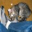

In [14]:
image_test[0:1]['image'].explore()

In [15]:
cat_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 14.117ms     |

| Done         |         | 100         | 55.825ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


In [16]:
def get_images_from_ids(query_result):
    return image_train.filter_by(query_result['reference_label'],'id')

,SArray
0,

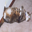

In [17]:
cat_image = image_train[image_train['id']==16289]
cat_image['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 10.776ms     |

| Done         |         | 100         | 65.574ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

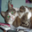
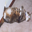
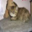
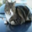
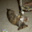

In [18]:
get_images_from_ids(cat_model.query(image_test[0:1]))['image'].explore()

In [19]:
cat_model.query(image_test[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 11.407ms     |

| Done         |         | 100         | 54.82ms      |

+--------------+---------+-------------+--------------+

36.15573070978294

In [20]:
dog_model.query(image_test[0:1])['distance'].mean()


Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 10.005ms     |

| Done         |         | 100         | 58.862ms     |

37.77071136184156

+--------------+---------+-------------+--------------+

In [21]:
image_test_automobile = image_test.filter_by(['automobile'],'label')
image_test_cat = image_test.filter_by(['cat'],'label')
image_test_dog = image_test.filter_by(['dog'],'label')
image_test_bird = image_test.filter_by(['bird'],'label')

In [22]:
dog_cat_neighbors = cat_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 128000  | 25.1473     | 397.148ms    |

| Done         | 509000  | 100         | 432.517ms    |

+--------------+---------+-------------+--------------+

In [23]:
dog_dog_neighbors = dog_model.query(image_test_dog, k=1)


Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 128000  | 25.1473     | 406.384ms    |

| Done         | 509000  | 100         | 409.775ms    |

+--------------+---------+-------------+--------------+

In [24]:
dog_automobile_neighbors = automobile_model.query(image_test_dog, k=1)


Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 128000  | 25.1473     | 385.629ms    |

| Done         | 509000  | 100         | 407.855ms    |

+--------------+---------+-------------+--------------+

In [25]:
dog_bird_neighbors = bird_model.query(image_test_dog, k=1)


Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 120000  | 25.1046     | 362.586ms    |

| Done         | 478000  | 100         | 385.02ms     |

+--------------+---------+-------------+--------------+

In [27]:
dog_distances = tc.SFrame({'dog_automobile': dog_automobile_neighbors['distance'],
                              'dog_bird': dog_bird_neighbors['distance'],
                              'dog_cat': dog_cat_neighbors['distance'],
                              'dog_dog': dog_dog_neighbors['distance']
                             })

In [28]:
dog_distances.head()


dog_automobile,dog_bird,dog_cat,dog_dog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193
39.22696649347584,38.27228869398105,34.77882479101661,37.484925090925636
40.58451176980721,39.146208923590486,35.11715782924591,34.94516534398124
45.10673529610854,40.523040105962316,40.60958309132649,39.095727834463545
41.32211409739762,38.19479183926956,39.90368673062214,37.76961310322034
41.82446549950164,40.156713166131446,38.067470016821176,35.10891446032838
45.497692940110376,45.55979626027668,42.72587329506032,43.242283258453455


In [29]:
def is_dog_correct(row):  
    if row['dog_dog'] <= min(row.values()):     
        return 1    
    else:        
        return 0

In [30]:
dog_distances.apply(is_dog_correct)


dtype: int
Rows: 1000
[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ... ]

In [31]:
dog_distances.apply(is_dog_correct).sum()


678

In [34]:
cat_distances = tc.SFrame({'cat_automobile': automobile_model.query(image_test_cat, k=1)['distance'],
                                 'cat_bird': bird_model.query(image_test_cat, k=1)['distance'],
                                 'cat_cat': cat_model.query(image_test_cat, k=1)['distance'],
                                 'cat_dog': dog_model.query(image_test_cat, k=1)['distance'],
                                })

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 127000  | 24.9509     | 380.073ms    |

| Done         | 509000  | 100         | 402.102ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 120000  | 25.1046     | 344.507ms    |

| Done         | 478000  | 100         | 420.492ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 128000  | 25.1473     | 390.001ms    |

| Done         | 509000  | 100         | 403.364ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 127000  | 24.9509     | 393.046ms    |

| Done         | 509000  | 100         | 403.506ms    |

+--------------+---------+-------------+--------------+

In [35]:
def is_cat_correct(row):  
    if row['cat_cat'] <= min(row.values()):     
        return 1    
    else:        
        return 0

In [36]:
cat_distances.apply(is_cat_correct).sum()


548

In [37]:
dog_distances.apply(is_dog_correct).sum()/float(len(dog_distances))

0.678